# Official Column Definitions

The following definitions are taken from the UCI Machine Learning Repository documentation
for the "Default of Credit Card Clients" dataset.

- X1: LIMIT_BAL — Amount of given credit (NT dollar)
- X2: SEX — Gender (1 = male, 2 = female)
- X3: EDUCATION — Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- X4: MARRIAGE — Marital status (1 = married, 2 = single, 3 = others)
- X5: AGE — Age in years
<br><br>
- X6: PAY_0 — Repayment status in September (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- X7: PAY_2 — Repayment status in August (scale same as above)
- X8: PAY_3 — Repayment status in July (scale same as above)
- X9: PAY_4 — Repayment status in June (scale same as above)
- X10: PAY_5 — Repayment status in May (scale same as above)
- X11: PAY_6 — Repayment status in April (scale same as above)
<br><br>
- X12: BILL_AMT1 — Bill statement amount in September
- X13: BILL_AMT2 — Bill statement amount in August
- X14: BILL_AMT3 — Bill statement amount in July
- X15: BILL_AMT4 — Bill statement amount in June
- X16: BILL_AMT5 — Bill statement amount in May
- X17: BILL_AMT6 — Bill statement amount in April
<br><br>
- X18: PAY_AMT1 — Amount paid in September
- X19: PAY_AMT2 — Amount paid in August
- X20: PAY_AMT3 — Amount paid in July
- X21: PAY_AMT4 — Amount paid in June
- X22: PAY_AMT5 — Amount paid in May
- X23: PAY_AMT6 — Amount paid in April
<br><br>
- TARGET: default payment next month - Default payment next month (1 = yes, 0 = no)


# Goal and Plan
The goal of this project is to predict if a client is at risk of defaulting on their debt in the following month.

This notebook is structured as follows:

1. Exploratory Data Analysis (EDA):
    - What are we working with?
    - Note areas that will require cleaning
2. Data Cleaning:
    - Address problems found during EDA
3. Feature Engineering and Model Building:
    - Select and transform data for model building
    - Interpret the results of each individual model 
4. Final Results:
    - Comparison of model results
5. Conclusion:
    - Discuss final findings
    - Discuss ways to improve model in the future

# 1. Exploratory Data Analysis
In this section we will be taking our first look at the data. Pieces of information we will be looking for:
- Ensure appropriate column headers
- Check for missing or null values
- Check for any duplicate rows
- Look at statistics of each feature to find any potential abnormalities 

In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Load and View Data

In [26]:
df = pd.read_csv("../data/credit_default.csv", header = 1)
print("Shape:", df.shape)
df.head()

Shape: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Missing or Null Values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There appears to be no missing or null values.

## Description of Age and Categorical Data

In [28]:
df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

,SEX,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


#### Initial findings of **categorical data**:
- SEX (1 = male, 2 = female):
    - With a mean of 1.6, the data seems to have a balance of males and females (not skewed by one gender).

- EDUCATION (1 = graduate school, 2 = university, 3 = high school, 4 = others):
    - With a max of **6**, there appears to be other values > 4 being used for **other** education.
    - Contains a label **0**.
    
- MARRIAGE (1 = married, 2 = single, 3 = others):
    - Contains a label **0**.

## Description of Repayment Status
Scale: (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [29]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### Initial findings of **repayment status**:
- `PAY_0` needs to be renamed to `PAY_1`
- Paid on-time is supposed to be a value of **-1**, yet we see a min value of **-2**. 
    - We should correct the data to have **0** be paid on time, with any positive value representing the number of months payment was delayed.

## Description of Bill Statement

In [30]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


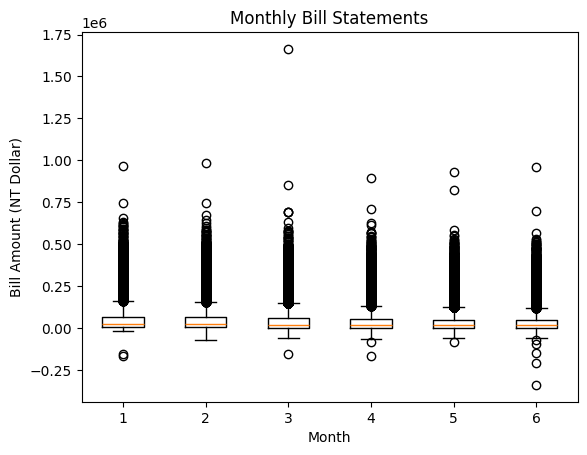

In [31]:
plt.boxplot(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.xlabel("Month")
plt.ylabel("Bill Amount (NT Dollar)")
plt.title("Monthly Bill Statements")
plt.show()

#### Initial findings of **bill statement**:
- There appears to be credits applied to some of the accounts as the minimums for each monthly billing amount is **negative**.

## Description of Paid Amounts

In [32]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


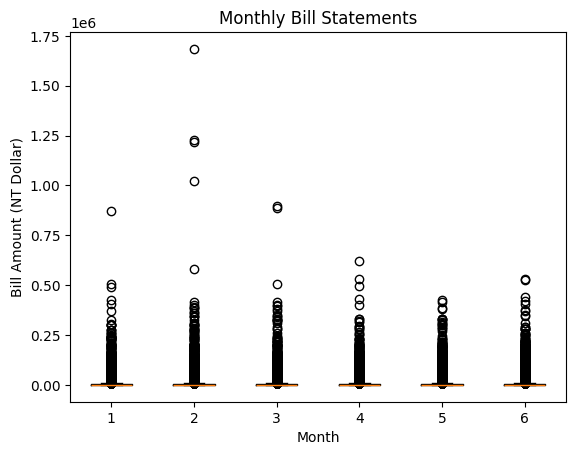

In [33]:
plt.boxplot(df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.xlabel("Month")
plt.ylabel("Bill Amount (NT Dollar)")
plt.title("Monthly Bill Statements")
plt.show()

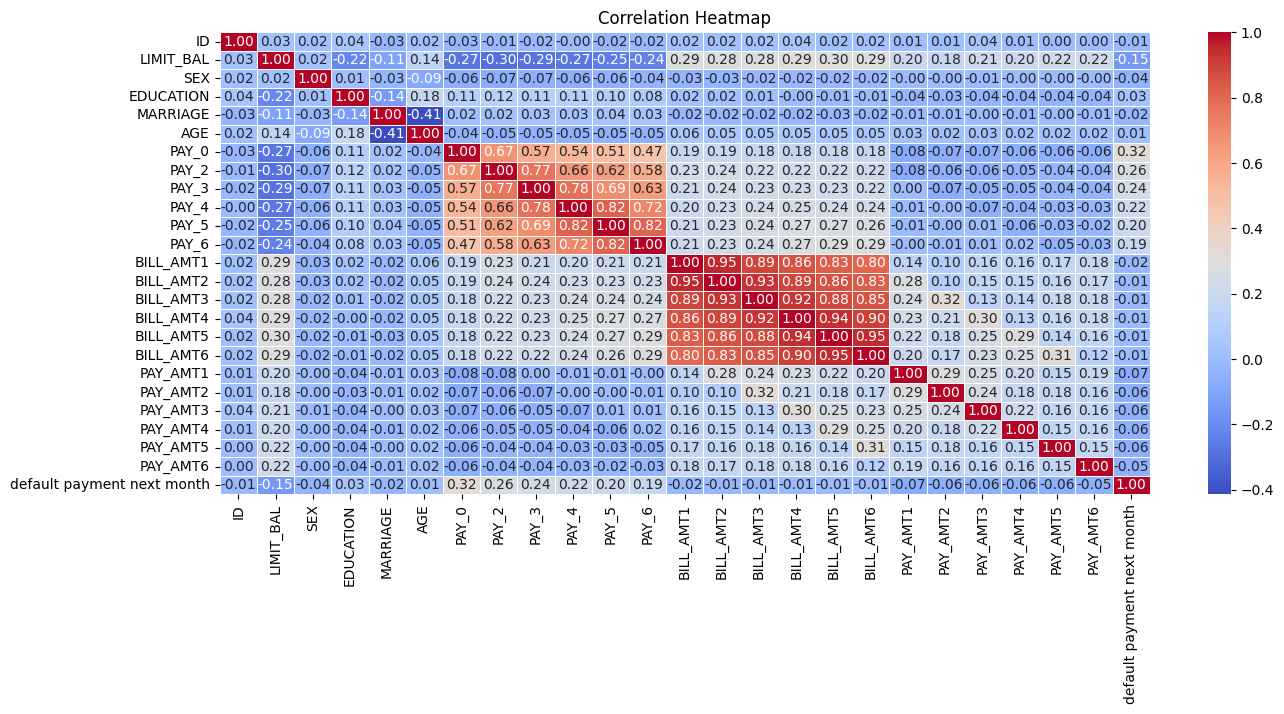

In [34]:
matrix = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(matrix, annot=True, cmap = "coolwarm", fmt = ".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 2. Data Cleaning

In this section we will be making corrections to issues we found during EDA.

## Drop 'ID" Column
The `ID` columns just acts as an index, so we can drop it.

In [35]:
df.drop('ID', axis = 1, inplace = True)

## Rename Columns
We want to work with more appropriate names to make the data easier to read.

In [36]:
df = df.rename(columns ={"PAY_0":"PAY_1","default payment next month":"DEFAULT"})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Fit Values to Appropriate Range

In [37]:
df['SEX'] = df['SEX'] - 1
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] - 1
df[['SEX','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.603733,-1.016700,-1.133767,-1.166200,-1.220667,-1.266200,-1.291100
std,0.489129,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
50%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


- `SEX`: Converted to a binary variable (0 = Male, 1 = Female)
- `PAY_X`: Set the paid on-time value to **0** and every positive value after represents number of months payment was delayed.

## Correct Mislabeled Data

In [38]:
df.loc[(df['EDUCATION'] > 4) | (df['EDUCATION'] < 1), 'EDUCATION'] = 4 # Set education to 'other'
df.loc[df['MARRIAGE'] < 1, 'MARRIAGE'] = 3 # Set marital status to 'other'
df[['EDUCATION', 'MARRIAGE']].describe()

,EDUCATION,MARRIAGE
count,30000.000000,30000.000000
mean,1.842267,1.557267
std,0.744494,0.521405
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,4.000000,3.000000


## Create Dummy Variables

In [39]:
df = pd.get_dummies(df, columns=['MARRIAGE', 'EDUCATION'], dtype=int)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,DEFAULT,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,20000,1,24,1,1,-2,-2,-3,-3,3913,...,0,0,1,1,0,0,0,1,0,0
1,120000,1,26,-2,1,-1,-1,-1,1,2682,...,0,2000,1,0,1,0,0,1,0,0
2,90000,1,34,-1,-1,-1,-1,-1,-1,29239,...,1000,5000,0,0,1,0,0,1,0,0
3,50000,1,37,-1,-1,-1,-1,-1,-1,46990,...,1069,1000,0,1,0,0,0,1,0,0
4,50000,0,57,-2,-1,-2,-1,-1,-1,8617,...,689,679,0,1,0,0,0,1,0,0


# 3. Feature Engineering & Model Building

In [40]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve
    )


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
def evaluate_model(name, model, X_test, y_test, threshold = 0.5):
    
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {name}")
    plt.legend()
    plt.show()

    return {
        "Name": name,
        "ROC_AUC": float(round(roc_auc_score(y_test, y_proba), 3)),
        "PR_AUC": float(round(average_precision_score(y_test, y_proba), 3)),
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1": round(f1_score(y_test, y_pred), 3),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
    }
    

In [50]:
X = df.drop('DEFAULT', axis = 1)
y = df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.75, 
    stratify=y
)

results = []

## Logistic Regression (Baseline)

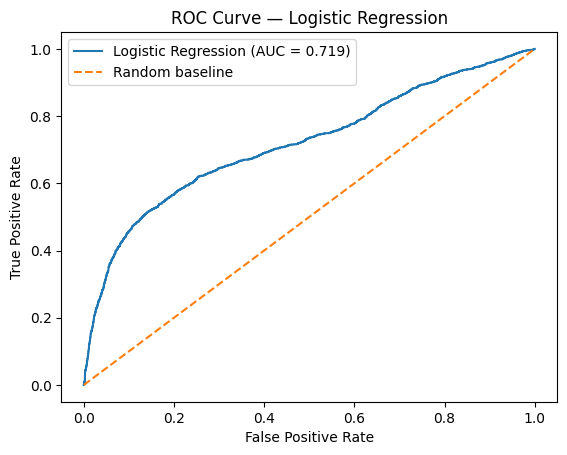

In [51]:
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        penalty = 'l1',
        solver = 'liblinear',
        C = 0.1,
        max_iter=2000,
        random_state=42))
])

logreg.fit(X_train, y_train)

lr_results = evaluate_model("Logistic Regression", logreg, X_test, y_test)
results.append(lr_results)

## Decision Tree (Simple Nonlinear Check)

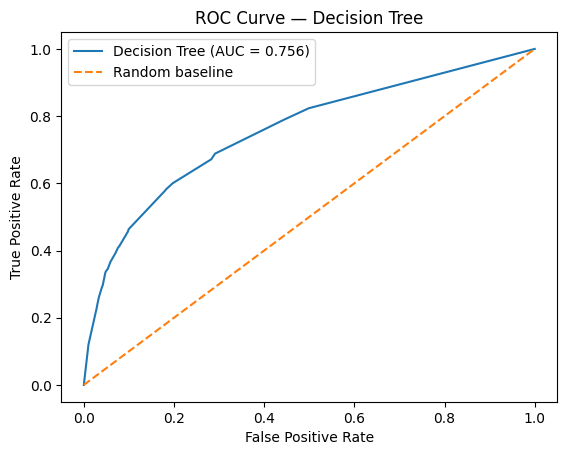

In [52]:
dectree = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_leaf = 50,
    random_state=42
)

dectree.fit(X_train, y_train)

dectree_results = evaluate_model("Decision Tree", dectree, X_test, y_test)
results.append(dectree_results)

## Random Forest (Robust Ensemble)

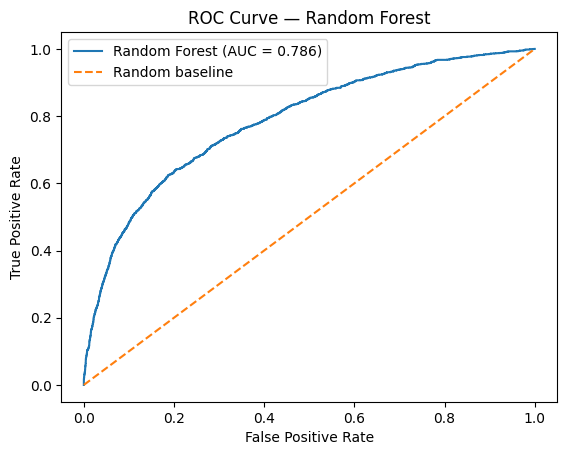

In [53]:
rf = RandomForestClassifier(
    n_estimators=400,
    min_samples_leaf=50,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

rf_results = evaluate_model("Random Forest", rf, X_test, y_test)
results.append(rf_results)

## Gradient Boosting (Stronger Sequential Trees)

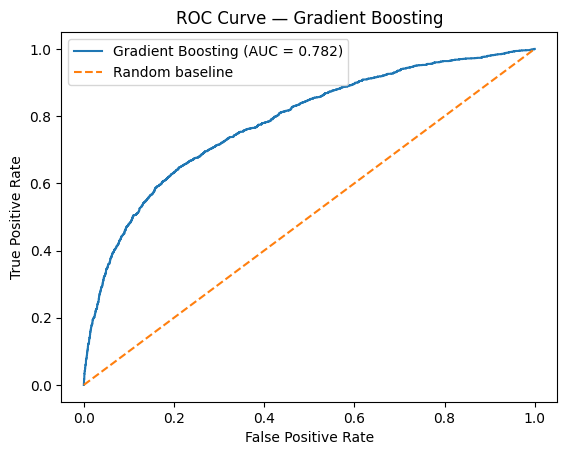

In [54]:
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

gb_results = evaluate_model("Gradient Boosting", gb, X_test, y_test)
results.append(gb_results)

## XGBoosting (Benchmark)

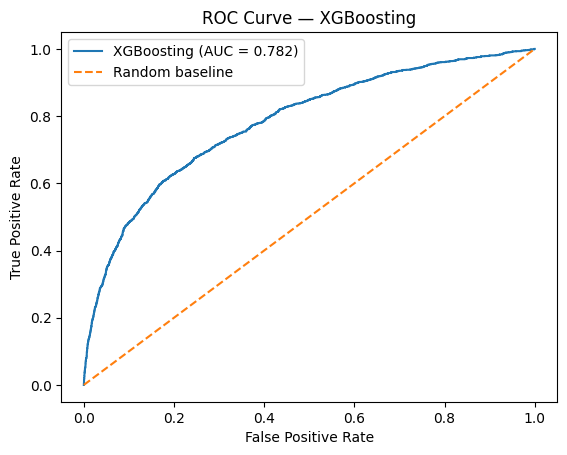

In [55]:
xgb = XGBClassifier(
    n_estimators = 800,
    learning_rate = 0.03,
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_lambda = 1.0,
    n_jobs = -1,
    eval_metric = 'logloss',
    tree_method = "hist",
    random_state = 42
)

xgb.fit(X_train, y_train)

xgb_results = evaluate_model("XGBoosting", xgb, X_test, y_test)
results.append(xgb_results)

In [56]:
results_df = pd.DataFrame(results).sort_values(by = "ROC_AUC", ascending = False)
results_df

,Name,ROC_AUC,PR_AUC,Accuracy,Precision,Recall,F1,TN,FP,FN,TP,Confusion Matrix
2,Random Forest,0.786,0.551,0.814,0.649,0.345,0.450,5532,309,1087,572,"[[5532, 309], [1087, 572]]"
4,XGBoosting,0.782,0.552,0.815,0.646,0.362,0.464,5512,329,1059,600,"[[5512, 329], [1059, 600]]"
3,Gradient Boosting,0.782,0.548,0.816,0.653,0.358,0.462,5525,316,1065,594,"[[5525, 316], [1065, 594]]"
1,Decision Tree,0.756,0.501,0.814,0.649,0.345,0.450,5532,309,1087,572,"[[5532, 309], [1087, 572]]"
0,Logistic Regression,0.719,0.497,0.808,0.686,0.241,0.356,5658,183,1260,399,"[[5658, 183], [1260, 399]]"


# 4. Final Results

This project compared five supervised classification models to predict credit card default, using ROC-AUC and PR-AUC as the primary ranking metrics and accuracy/precision/recall/F1 to understand classification trade-offs.

Across all models, ensemble methods performed best. Random Forest achieved the highest ROC-AUC (0.786) with strong overall accuracy (0.814), indicating the best ranking performance among the models evaluated. Gradient Boosting and XGBoost were close behind (ROC-AUC = 0.782) and produced slightly higher recall than Random Forest (≈0.36 vs 0.345), suggesting better capture of default cases at the default 0.50 threshold.

In contrast, Logistic Regression produced the weakest ROC-AUC (0.719) and had the lowest recall (0.241). While its precision was comparatively high, the model missed a large portion of true default cases, which may be undesirable in a credit risk context where false negatives can be costly.

A key takeaway is that while overall accuracy was similar across models (~0.81), recall remained modest across the board, reflecting the imbalanced nature of the dataset (~22% defaults) and the use of a fixed 0.50 decision threshold. In a real deployment setting, the next step would be to tune the classification threshold (and/or apply class weighting or cost-sensitive learning) to better align the model with business goals—such as prioritizing recall to reduce missed defaults, or precision to reduce unnecessary credit restrictions.

Recommended model: Random Forest (best ROC-AUC overall), with Gradient Boosting / XGBoost as strong alternatives depending on the preferred precision–recall tradeoff and deployment constraints.